# 1. Data Exploration

## Introduction

Ce notebook est dédié à l’exploration et à la préparation du dataset MIAS.  
L’objectif est de comprendre la structure des données, d’analyser la distribution des classes, de vérifier la qualité des informations (valeurs manquantes, doublons) et de visualiser quelques exemples d’images annotées.

Nous allons :
- Importer les librairies nécessaires
- Charger et explorer les données
- Analyser la distribution des classes et expliquer chaque type d’anomalie
- Vérifier la qualité des données (valeurs manquantes, doublons)
- Visualiser des exemples d’images

Chaque étape est expliquée et commentée pour faciliter la compréhension et préparer au mieux la phase de modélisation.

## 1. Importation des librairies  

Avant de commencer l’analyse, nous importons les librairies nécessaires pour la manipulation des données, la visualisation et la modélisation. Cela garantit la reproductibilité et la clarté du code.
 
**Librairies utilisées :**
- **pandas** : Manipulation et analyse des métadonnées MIAS
- **matplotlib** : Visualisation des données et des résultats
- **pathlib** : Gestion des chemins de fichiers
- **numpy** : Calculs numériques et manipulation des tableaux
- **PIL** : Traitement des images (redimensionnement, conversion)
- **scikit-learn** : Division des données (train/validation/test)
- **TensorFlow/Keras** : Construction et entraînement du modèle CNN

In [21]:
# ----- Import libraries PEP 8 -----
# ----- Standard library -----
import pandas as pd # Pour manipuler et analyser les métadonnées
import matplotlib.pyplot as plt # Pour les visualisations 
import pathlib # Pour la gestion des chemins de fichiers
import numpy as np # Pour les opérations mathématiques et les tableaux
from PIL import Image # Pour le traitement d'images


print("Librairies importées avec succès.")

Librairies importées avec succès.


## 2. Importation et exploration du dataset

Nous chargeons le fichier d'annotations MIAS qui contient les métadonnées de chaque mammographie. Cette étape initiale permet de vérifier que le dataset est accessible et de comprendre sa structure avant l'analyse approfondie.

In [22]:
# Chargement du fichier CSV contenant les métadonnées MIAS
chemin_csv = "../data/raw/MIAS/mias_info.csv" # Chemin vers le fichier CSV des métadonnées
df = pd.read_csv(chemin_csv) # Chargement du fichier CSV dans un DataFrame

# Information sur le DataFrame
print(f"Nombre d'images : {len(df)}") # Affiche le nombre d'images
print(f"Nombre de colonne : {len(df.columns)}") # Affiche le nombre de colonnes
print(f"Titres des c olonnes du CSV : {df.columns.tolist()}") # Affiche les titres des colonnes du DataFrame dans une liste
display(df.head()) # Affiche les 5 premières lignes du DataFrame pour vérification


Nombre d'images : 330
Nombre de colonne : 7
Titres des c olonnes du CSV : ['REFNUM', 'BG', 'CLASS', 'SEVERITY', 'X', 'Y', 'RADIUS']


,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0


## 3. Analyse de la distribution des classes

Nous examinons la répartition des différentes classes (types d’anomalies, sévérité) afin d’identifier d’éventuels déséquilibres ou problèmes de représentativité. Cela aide à anticiper les défis liés à l’apprentissage du modèle.

In [23]:
# Distribution des classes
print(f"\nDistribution : {df['CLASS'].value_counts()}") # Affiche la distribution des classes dans la colonne 'CLASS'


Distribution : CLASS
NORM    207
CALC     30
CIRC     25
ARCH     19
SPIC     19
MISC     15
ASYM     15
Name: count, dtype: int64


Explication détaillée de chaque classe du dataset MIAS :

- **NORM** : Images normales, sans anomalie détectée. C’est la classe majoritaire.
- **CALC** : Calcifications. Petits dépôts de calcium dans le tissu mammaire, parfois signe précoce de cancer.
- **CIRC** : Masses circulaires. Nodules ou masses bien délimitées, qui peuvent être bénignes ou malignes.
- **ARCH** : Masses archées. Formes arquées ou courbées, souvent associées à des lésions spécifiques.
- **SPIC** : Masses spiculées. Présence de “rayons” autour d’une masse, souvent signe de malignité.
- **MISC** : Anomalies diverses. Regroupe les lésions qui ne rentrent pas dans les autres catégories.
- **ASYM** : Asymétries. Différences de densité ou de structure entre les deux seins, pouvant indiquer une anomalie.

## 4. Vérification des valeurs manquantes et des doublons

Nous vérifions la présence de valeurs manquantes et de doublons dans le dataset. Cette étape est cruciale pour garantir la qualité des données et éviter les biais ou erreurs lors de la modélisation.

In [24]:
print("Valeurs manquantes par colonne :") # Titre
print(df.isnull().sum()) # .isnull() affiche les valeurs manquantes, .sum() fait la somme des valeurs manquantes par colonne

print(f"\nNombre de doublons : {df.duplicated().sum()}") # .duplicated() identifie les doublons, .sum() fait la somme des doublons

Valeurs manquantes par colonne :
REFNUM        0
BG            0
CLASS         0
SEVERITY    207
X           211
Y           211
RADIUS      211
dtype: int64

Nombre de doublons : 0


## 5. Visualisation d’images annotées

Nous affichons quelques exemples d’images du dataset avec leurs annotations pour mieux comprendre la nature des données et valider la correspondance entre les fichiers et les labels.

Nombre d'images trouvées : 322


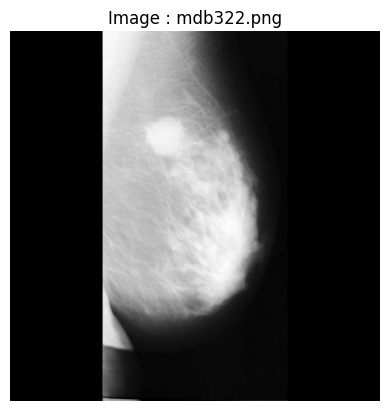

In [25]:
chemin_dossier_images = pathlib.Path("../data/raw/MIAS/MIAS") # Chemin vers le dossier contenant les images

liste_images = list(chemin_dossier_images.glob("*.png")) # .glob() récupère tous les fichiers PNG
print(f"Nombre d'images trouvées : {len(liste_images)}") # Affiche le nombre d'images trouvées et affiche le nombre

# Affiche la première image si elle existe
if liste_images:
    image = plt.imread(liste_images[0]) # .imread() lit l'image et la charge dans un tableau
    plt.imshow(image, cmap='gray') # .imshow() affiche l'image en niveaux de gris
    plt.title(f"Image : {liste_images[0].name}") # .title() ajoute un titre à l'image
    plt.axis('off') # .axis('off') masque les axes
    plt.show() # .show() affiche l'image
else:
    print("Aucune image PNG trouvée dans ce dossier.")

## 6. Aperçu statistique des données

Avant de passer à la modélisation, il est important d’examiner les statistiques des colonnes numériques du dataset (X, Y, RADIUS).  
Cela permet de :
- Vérifier la cohérence des coordonnées et des tailles de lésions
- Détecter d’éventuelles valeurs aberrantes ou erreurs de saisie
- Mieux comprendre la répartition spatiale et dimensionnelle des anomalies

Nous allons aussi afficher les valeurs uniques des colonnes catégorielles pour s’assurer qu’il n’y a pas d’erreur de saisie ou de catégorie inattendue.

In [26]:
# Aperçu statistique des données
print("Statistiques descriptives des colonnes numériques :") # Titre
display(df[['RADIUS']].describe()) # .describe() donne la moyenne, l'écart-type, les min/max, etc. pour la colonne 'RADIUS'

# Aperçu des valeurs uniques pour les colonnes catégorielles
for colonne in ['CLASS', 'SEVERITY', 'BG']: # Pour chaque colonne dans ['CLASS', 'SEVERITY', 'BG']
    print(f"\nValeurs dans la colonne {colonne} : {df[colonne].unique()}") # .unique() affiche les valeurs uniques dans chaque colonne catégorielle


Statistiques descriptives des colonnes numériques :


,RADIUS
count,119.000000
mean,48.848739
std,33.558863
min,3.000000
25%,27.000000
50%,41.000000
75%,61.500000
max,197.000000



Valeurs dans la colonne CLASS : ['CIRC' 'NORM' 'MISC' 'ASYM' 'ARCH' 'SPIC' 'CALC']

Valeurs dans la colonne SEVERITY : ['B' nan 'M']

Valeurs dans la colonne BG : ['G' 'D' 'F']


## 7. Visualisation des distributions numériques

Pour aller plus loin dans l’exploration, il est utile de visualiser les tailles de lésions (RADIUS).  
Cela permet de repérer visuellement d’éventuelles valeurs aberrantes ou des tendances dans le dataset.

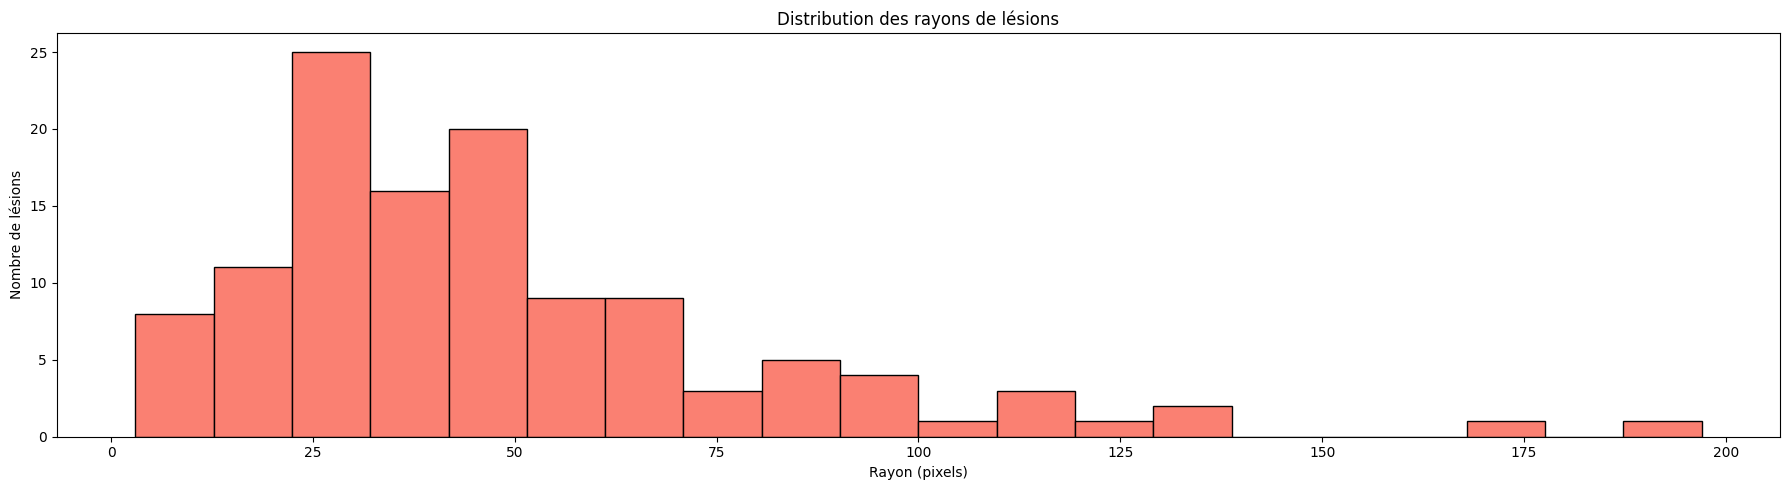

In [27]:
fig, ax = plt.subplots(figsize=(18, 5)) # Création de sous-graphes

# Histogramme des rayons
ax.hist(df['RADIUS'].dropna(), bins=20, color='salmon', edgecolor='black') # .hist() crée un histogramme et .dropna() ignore les valeurs manquantes

# Titres/Labels
ax.set_title('Distribution des rayons de lésions') # .set_title() définit le titre de l'axe
ax.set_xlabel('Rayon (pixels)') # .set_xlabel() définit le label de l'axe des x
ax.set_ylabel('Nombre de lésions')

plt.tight_layout() # .tight_layout() ajuste les sous-graphes pour éviter le chevauchement

- Histogrammes pour visualiser la répartition des rayons de lésions.
- `.dropna()` permet d’ignorer les valeurs manquantes, donc seuls les cas annotés sont affichés.
- Cette visualisation aide à repérer des valeurs extrêmes ou des erreurs de saisie (par exemple, un rayon très grand ou très petit).
- Cela permet aussi de mieux comprendre la localisation et la taille typique des anomalies dans le dataset.

## Conclusion

L’exploration du dataset MIAS a permis de :
- Comprendre la structure et le contenu des données
- Identifier la distribution des classes et le déséquilibre
- Vérifier la qualité des données (valeurs manquantes, doublons)
- Visualiser quelques exemples d’images annotées

Le dataset est maintenant prêt pour la phase de préparation et de modélisation, qui sera réalisée dans le notebook suivant.